This is a classification problem:

Cheat sheet
https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning
https://images.datacamp.com/image/upload/v1676302389/Marketing/Blog/Scikit-Learn_Cheat_Sheet.pdf

https://www.datacamp.com/blog/classification-machine-learning
Lazy Learners Vs. Eager Learners
There are two types of learners in machine learning classification: lazy and eager learners. 

Eager learners are machine learning algorithms that first build a model from the training dataset before making any prediction on future datasets. They spend more time during the training process because of their eagerness to have a better generalization during the training from learning the weights, but they require less time to make predictions. 

Most machine learning algorithms are eager learners, and below are some examples: 
- Logistic Regression. 
- Support Vector Machine. 
- Decision Trees. 
- Artificial Neural Networks. 

Lazy learners or instance-based learners, on the other hand, do not create any model immediately from the training data, and this is where the lazy aspect comes from. They just memorize the training data, and each time there is a need to make a prediction, they search for the nearest neighbor from the whole training data, which makes them very slow during prediction. Some examples of this kind are: 

- K-Nearest Neighbor. 
- Case-based reasoning. 
However, some algorithms, such as BallTrees and KDTrees, can be used to improve the prediction latency. 

Help from youtube: https://www.youtube.com/watch?app=desktop&v=I3FBJdiExcg&t=371s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None


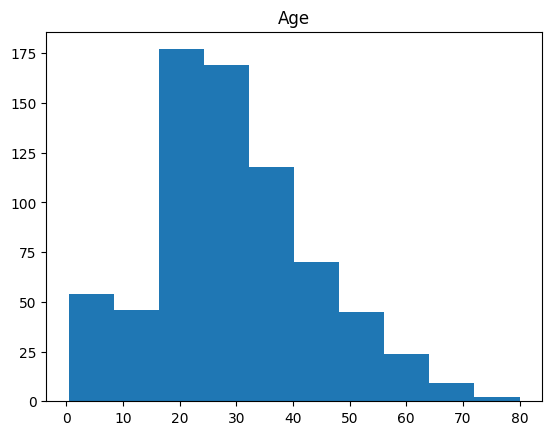

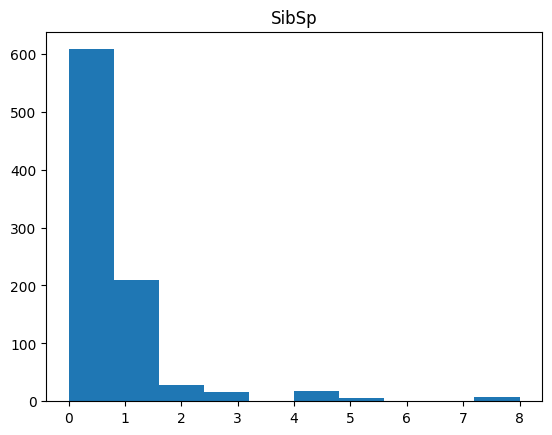

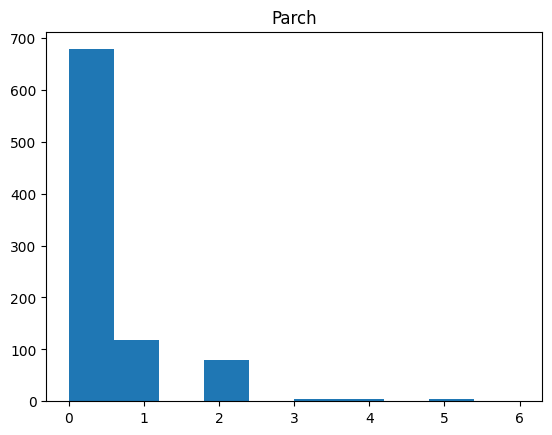

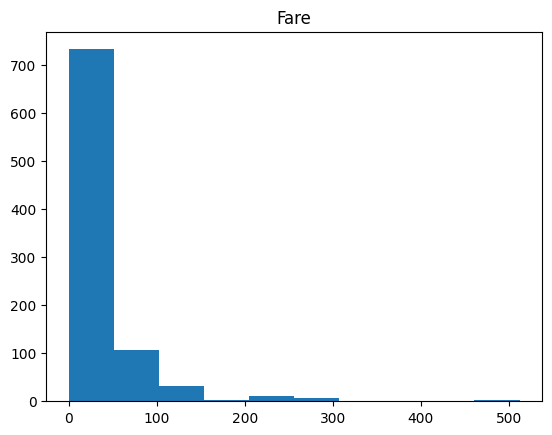

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")
df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['Survived'] = np.NaN
df0 = pd.concat([df_train,df_test])

# info, boxplots and histograms
print(df_train.info())
df_train.describe()

df_train_num= df_train[['Age', 'SibSp', 'Parch', 'Fare']]
df_train_cat= df_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

for i in df_train_num.columns:
    plt.hist(df_train_num[i])
    plt.title(i)
    plt.show()


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


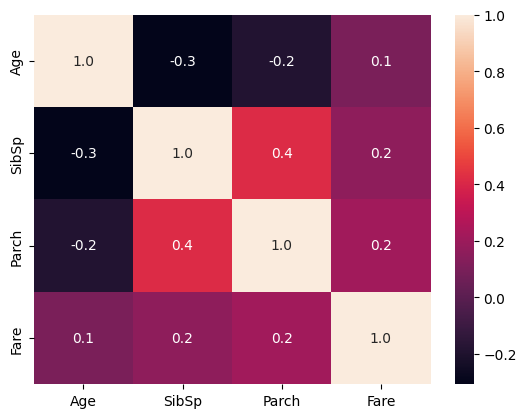

In [52]:

print(df_train_num.corr())
sns.heatmap(df_train_num.corr(), annot=True, fmt=".1f")
plt.show()


In [53]:

pd.pivot_table(df_train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


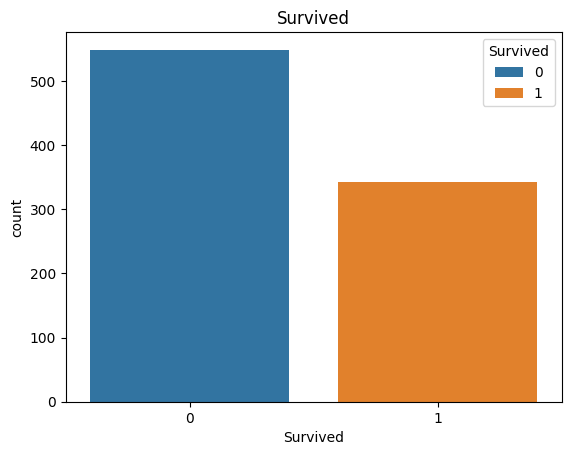

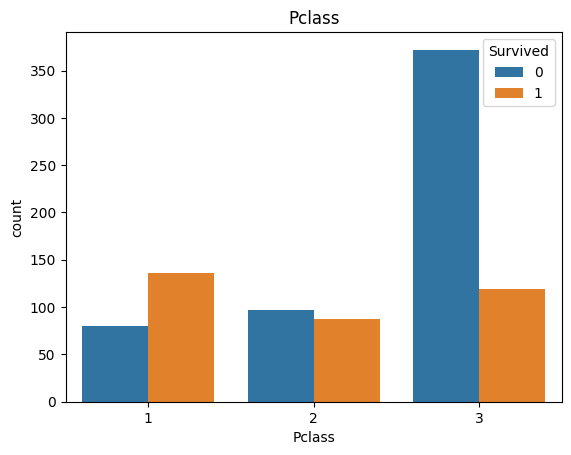

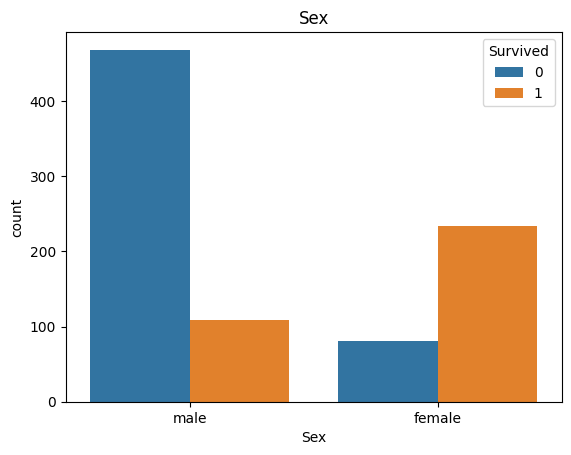

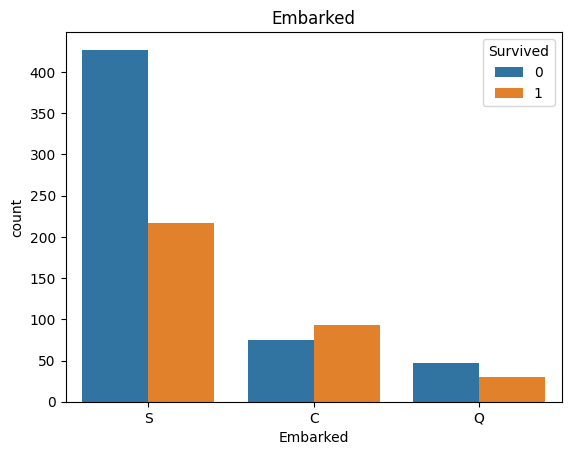

In [54]:
for i in df_train_cat:
    if i == 'Ticket' or i == 'Cabin':
        continue
    sns.countplot(df_train_cat, x=i, hue="Survived").set_title(i)
    plt.show()

Cabins

In [55]:
#print(df0['Cabin'].unique())
df0['Cabin_Letter'] = df0['Cabin'].apply(lambda x: str(x)[0])
print(df0['Cabin_Letter'].value_counts())
pd.pivot_table(df0, index='Survived', columns=['Cabin_Letter'], values='Name', aggfunc='count')

Cabin_Letter
n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


Cabin_Letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Ticket

In [56]:
#print(df0['Ticket'].unique())
df0['Ticket_IsNumeric'] = df0['Ticket'].apply(lambda x: str(x)[0].isnumeric())
print(df0['Ticket_IsNumeric'].value_counts())
pd.pivot_table(df0, index='Survived', columns=['Ticket_IsNumeric'], values='Name', aggfunc='count')

Ticket_IsNumeric
True     957
False    352
Name: count, dtype: int64


Ticket_IsNumeric,False,True
Survived,,
0.0,142,407
1.0,88,254


Name title

In [57]:
#print(df0['Name'].head())
df0['Name_Title'] = df0['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0].strip())
print(df0['Name_Title'].value_counts())
pd.pivot_table(df0, index='Survived', columns=['Name_Title'], values='Name', aggfunc='count')

Name_Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64


Name_Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


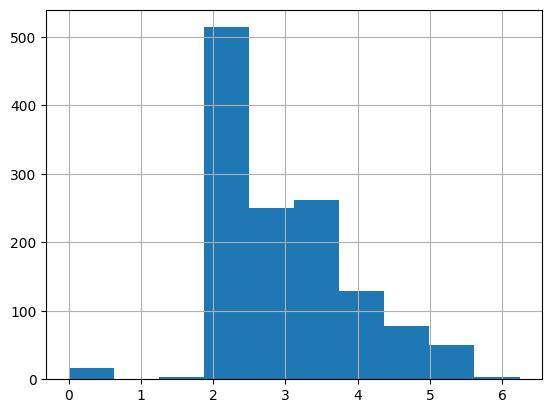

In [58]:
df0.fillna({'Age': df0['Age'].mean()}, inplace=True)
df0.fillna({'Fare' : df0['Fare'].mean()}, inplace=True)
df0.dropna(subset='Embarked', inplace=True)
df0['Fare_Normalized'] = np.log(df0['Fare']+1)
#df0['Fare'].hist()
df0['Fare_Normalized'].hist()
plt.show()

In [64]:
df0['Pclass'] = df0['Pclass'].astype(str)

df = df0[['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked', 'Cabin_Letter',
       'Name_Title', 'Fare_Normalized', 'train_test']]
df = pd.get_dummies(df)
print(df.columns.values)

['Age' 'SibSp' 'Parch' ... 'Name_Title_Rev' 'Name_Title_Sir'
 'Name_Title_the Countess']


Scale and create X_train y_train

In [65]:
from sklearn import neighbors, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#labelEncoder = LabelEncoder()
#'SibSp','Parch'
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

df_scaled = df.copy()
scaler = preprocessing.StandardScaler().fit(df_scaled[['Age', 'SibSp', 'Parch', 'Fare_Normalized']])
df_scaled[['Age', 'SibSp', 'Parch', 'Fare_Normalized']] = scaler.transform(df_scaled[['Age', 'SibSp', 'Parch', 'Fare_Normalized']])

X_train = df_scaled[df_scaled['train_test'] == 1].drop('train_test', axis=1)
X_test = df_scaled[df_scaled['train_test'] == 0].drop('train_test', axis=1)
y_train = df0[df0['train_test'] == 1]['Survived']

In [66]:
#knn = neighbors.KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train.values.ravel())
#y_pred = knn.predict(X_test)
#print(accuracy_score(y_test, y_pred))

# use cross_val_score with a KFold (No need for a train and a test)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
cv = cross_val_score(svc, X_train, y_train.values.ravel(), cv=5)
print(cv)
print(cv.mean())


[0.85393258 0.83146067 0.84269663 0.84269663 0.87570621]
0.8492985463086397


Cross Validation

KNeighbours

In [67]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors' : np.arange(3,8)}
knn = neighbors.KNeighborsClassifier()
grid_knn = GridSearchCV(estimator=knn, param_grid=knn_params)
grid_knn.fit(X_train, y_train.values.ravel())
allscores = grid_knn.cv_results_['mean_test_score']
print(allscores)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_.n_neighbors)



[0.82419974 0.81856594 0.82280114]
0.8245540531962166
5


Support Vector

In [68]:
svc_params = {'kernel': ['linear', 'poly', 'rbf']}
svc = SVC()
grid_svc = GridSearchCV(estimator=svc, param_grid=svc_params)
grid_svc.fit(X_train, y_train.values.ravel())
allscores = grid_svc.cv_results_['mean_test_score']
print(allscores)
print(grid_svc.best_score_)
print(grid_svc.best_estimator_.kernel)

[0.84929855 0.83131467 0.83130197]
0.8492985463086397
linear


Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr_params = {'max_iter': [2000], 'penalty':['l1', 'l2'], 'C':np.logspace(-4, 4, 20), 'solver':['liblinear']}
lr = LogisticRegression()
grid_lr = GridSearchCV(estimator=lr, param_grid=lr_params)
grid_lr.fit(X_train, y_train.values.ravel())
allscores = grid_lr.cv_results_['mean_test_score']
print(allscores)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_.penalty)
print(grid_lr.best_estimator_.C)

[0.61754586 0.71205485 0.61754586 0.71768552 0.61754586 0.72668698
 0.61754586 0.75706849 0.61754586 0.78520282 0.73229861 0.80429759
 0.78179394 0.81104552 0.80090776 0.81892338 0.8133054  0.81666984
 0.82230051 0.82680124 0.83019107 0.83130832 0.84030978 0.83919253
 0.83806259 0.84030978 0.84030978 0.84368057 0.83693265 0.84255697
 0.83804355 0.84705136 0.84142068 0.84705136 0.84142068 0.84592776
 0.84254428 0.84817495 0.8380499  0.84817495]
0.8481749508030216
l2
3792.690190732246


Ensemble

In [70]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('lr',grid_lr.best_estimator_), ('knn', grid_knn.best_estimator_), ('svc',grid_svc.best_estimator_)])
cv = cross_val_score(voting, X_train, y_train.values.ravel(), cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.83146067 0.84831461 0.84269663 0.87570621]
0.8504221418142576


Submission

In [74]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test).astype(int)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('titanic/submission.csv', index =False)